<a href="https://colab.research.google.com/github/XG11/ECE420FinalProject/blob/main/ECE420FinalProjectOpenCVmethod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
from scipy.ndimage import gaussian_filter, gaussian_gradient_magnitude
from scipy.spatial.distance import euclidean
from scipy.signal import convolve2d
import matplotlib.pyplot as plt

In [3]:
from google.colab import files
from PIL import Image
import numpy as np

uploaded_images1 = files.upload()
uploaded_images2 = files.upload()

image_path1 = next(iter(uploaded_images1))
image_path2 = next(iter(uploaded_images2))

image1 = Image.open(image_path1).convert('L')
image2 = Image.open(image_path2).convert('L')

image1_np = np.array(image1, dtype=np.float32)
image2_np = np.array(image2, dtype=np.float32)


Saving Stop1.jpg to Stop1.jpg


Saving stop2.jpg to stop2.jpg


In [5]:
'''import cv2
import numpy as np
from google.colab.patches import cv2_imshow

img1 = cv2.imread('Stop1.jpg', cv2.IMREAD_GRAYSCALE)  # Query image
img2 = cv2.imread('stop2.jpg', cv2.IMREAD_GRAYSCALE)  # Train image


# detect SIFT key points and descriptors
sift = cv2.SIFT_create()

# Find the key points and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# Step 2: Use BFMatcher to match descriptors
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)  # L2 norm (Euclidean distance)

# Use KNN to find the best matches
matches = bf.knnMatch(des1, des2, k=2)

# Step 3: Apply Lowe's ratio test to filter good matches
good_matches = []
for m, n in matches:
    if m.distance <  n.distance:  # Lowe's ratio test
        good_matches.append(m)

# Step 4: Draw the matches
img_matches = cv2.drawMatches(
    img1, kp1, img2, kp2, good_matches, None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)


# Step 5: Display the result
cv2_imshow(img_matches)
cv2.waitKey(0)
cv2.destroyAllWindows()


'''

"import cv2\nimport numpy as np\nfrom google.colab.patches import cv2_imshow\n\nimg1 = cv2.imread('Stop1.jpg', cv2.IMREAD_GRAYSCALE)  # Query image\nimg2 = cv2.imread('stop2.jpg', cv2.IMREAD_GRAYSCALE)  # Train image\n\n\n# detect SIFT key points and descriptors\nsift = cv2.SIFT_create()\n\n# Find the key points and descriptors with SIFT\nkp1, des1 = sift.detectAndCompute(img1, None)\nkp2, des2 = sift.detectAndCompute(img2, None)\n\n# Step 2: Use BFMatcher to match descriptors\nbf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)  # L2 norm (Euclidean distance)\n\n# Use KNN to find the best matches\nmatches = bf.knnMatch(des1, des2, k=2)\n\n# Step 3: Apply Lowe's ratio test to filter good matches\ngood_matches = []\nfor m, n in matches:\n    if m.distance <  n.distance:  # Lowe's ratio test\n        good_matches.append(m)\n\n# Step 4: Draw the matches\nimg_matches = cv2.drawMatches(\n    img1, kp1, img2, kp2, good_matches, None,\n    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS\n)\n\

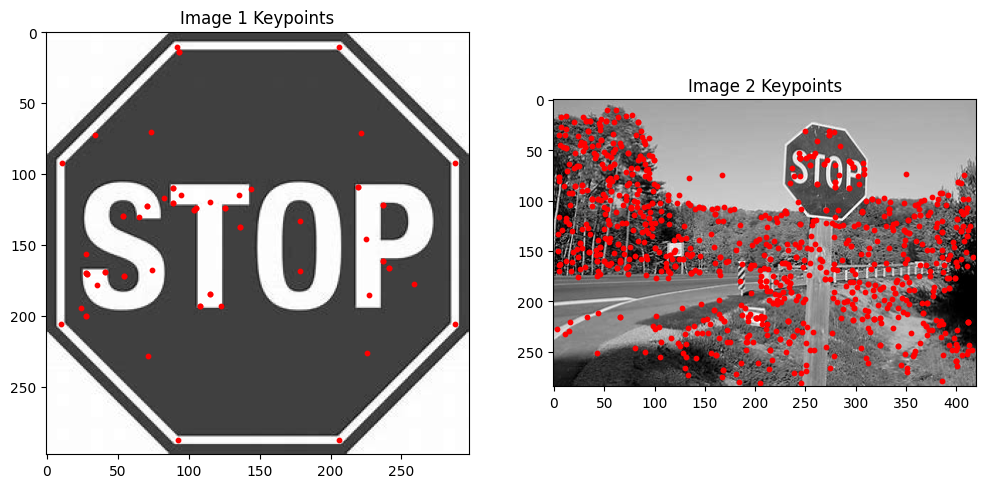

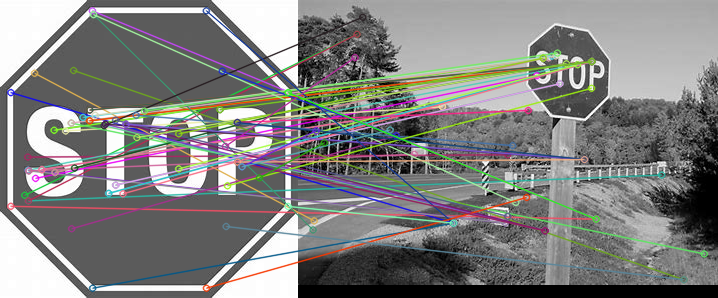

In [6]:
import cv2
import numpy as np
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

img1 = cv2.imread('Stop1.jpg', cv2.IMREAD_GRAYSCALE)
img2 = cv2.imread('stop2.jpg', cv2.IMREAD_GRAYSCALE)


# detect SIFT key points and descriptors
sift = cv2.SIFT_create()

# Find the key points and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(img1, None)
kp2, des2 = sift.detectAndCompute(img2, None)

# BFMatcher to match descriptors
bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=False)  # L2 norm (Euclidean distance)

#find the best matches
matches = bf.knnMatch(des1, des2, k=2)

#ratio test to filter good matches
good_matches = []
for m, n in matches:
    if m.distance <  n.distance:  # Lowe's ratio test
        good_matches.append(m)

#matches
img_matches = cv2.drawMatches(
    img1, kp1, img2, kp2, good_matches, None,
    flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS
)

plt.figure(figsize=(12, 6))


plt.subplot(1, 2, 1)
plt.imshow(img1, cmap='gray')
plt.scatter([kp.pt[0] for kp in kp1], [kp.pt[1] for kp in kp1], c='r', s=10)
plt.title("Image 1 Keypoints")


plt.subplot(1, 2, 2)
plt.imshow(img2, cmap='gray')
plt.scatter([kp.pt[0] for kp in kp2], [kp.pt[1] for kp in kp2], c='r', s=10)
plt.title("Image 2 Keypoints")


plt.show()
cv2_imshow(img_matches)
cv2.waitKey(0)
cv2.destroyAllWindows()
